# Lab: Forecasting

In this lab, we will explore the python package [statsmodels](http://www.statsmodels.org/dev/tsa.html) to forecast the time series data. You will learn to use different time series modeling technique for forecasting.

In [2]:
# # install packages
# import sys
# !pip3 install --prefix {sys.prefix} statsmodels

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

----------

## Air Passenger Dataset
This dataset provides monthly totals of international airline passengers from 1949 to 1960. You can find a copy of the dataset on [Kaggle](https://www.kaggle.com/rakannimer/air-passengers) or [R datasets](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html).

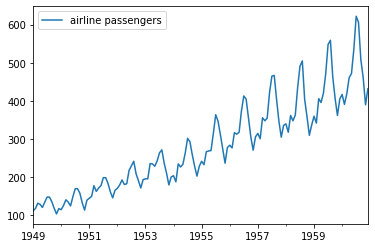

In [4]:
df = pd.read_csv('airline-passengers.csv', index_col=[0], parse_dates=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

# split the data into train and test
train, test = df.iloc[:130, [0]], df.iloc[130:, [0]]

df.plot()
pyplot.show()

## Time Series Decomposition
The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns, including:

- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.

There are two main ways to decomposite the dataset: the additive decomposition and the multiplicative decomposition.

### Additive Decomposition

In additive decomposition, different components are put together through addition. E.g. 

$y_t = Seasonality_t + Trend_t + Noise_t$

**TODO:** Study [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) API from `statsmodels.tsa.seasonal`, apply additive decomposition to the airline passenger dataset and plot each components from the decomposition.

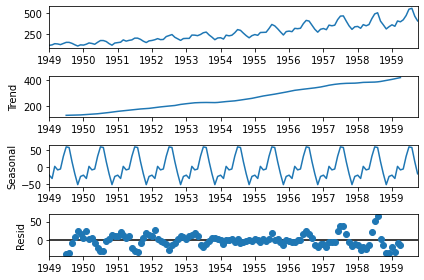

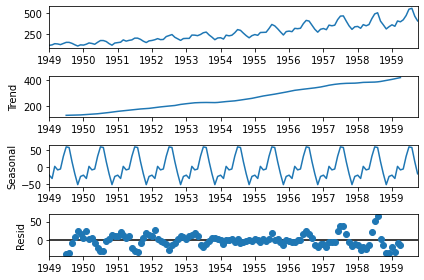

In [5]:
# additive decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# TODO
model = seasonal_decompose(x=train, model="additive")
model.plot()

### Multiplicative Decomposition

Similar to additive decomposition, we can decompose a time series through multiplication. E.g. 

$y_t = Seasonality_t * Trend_t * Noise_t$

**TODO:** Study [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) API from `statsmodels.tsa.seasonal`, apply multiplication decomposition to the same airline passenger dataset and plot each components from the decomposition. Which decomposition makes more sense in this dataset? 

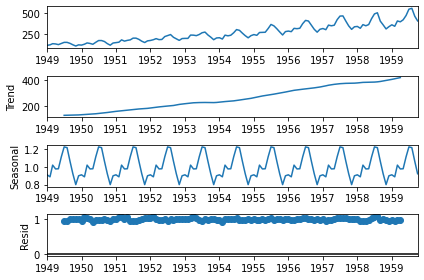

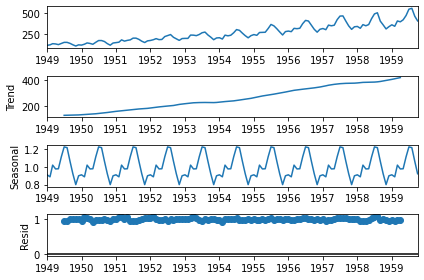

In [6]:
# multiplicative decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# TODO
model = seasonal_decompose(x=train, model="multiplicative")
model.plot()

----------

## Simple Exponential Smoothing (SES)
The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps. This method is suitable for forecasting data with no clear trend or seasonal pattern. 

**TODO**: you will apply the simple exponential smoothing technique ([SimpleExpSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameter `smoothing_level` and see how it impacts the model accuracy. 

In [121]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['airline passengers']).fit(smoothing_level=0.5)
predictions = model.forecast(14)

print("RMSE: ", sqrt(mean_squared_error(y_true=test['airline passengers'], y_pred=predictions)))
print("MAE: ", mean_absolute_error(y_true=test, y_pred=predictions))
# TODO

RMSE:  77.55372604125238
MAE:  60.642857142857146


----------

## Holt Winter’s Exponential Smoothing (HWES)
Holt Winter’s Exponential Smoothing (HWES) models the time series using an exponentially weighted linear function of prior observations with trends and seasonality taken into account. 

**TODO**: you will apply the HWES technique ([ExponentialSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [50]:
from surprise import accuracy
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(endog=train, seasonal_periods=12, trend='add', seasonal='mul').fit(smoothing_level=None)
prediction = model.forecast(steps=14)

print("RMSE: ", sqrt(mean_squared_error(y_true=test, y_pred=prediction)))
print("MAE: ", mean_absolute_error(y_true=test, y_pred=prediction))


RMSE:  19.009778805318184
MAE:  17.473773385893278


-----

## ARIMA model

### Autoregression model

The autoregression (AR) method models the time series using a linear function of the observations at prior time steps. The notation for the model involves specifying the order of the model as a parameter to the auto regression function. E.g. AR(1) is a first-order AR model.

**TODO**: you will apply Autoregression model ([AR](http://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [75]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random

# TODO
model = AR(endog=train).fit(maxlag=15)
predictions = model.predict(start=len(train), end=len(train) + len(test) -1)
print("RMSE: ", sqrt(mean_squared_error(y_true=test, y_pred=predictions)))
print("MAE: ", mean_absolute_error(y_true=test, y_pred=predictions))

RMSE:  17.42335409797816
MAE:  16.053489650346524


----------

### Moving Average Model

The moving average model models the time series with a linear function of the residual errors from a mean process at prior time steps. Similar to AR model, the notation for the model specifies the order of the model q as a parameter to the moving average function, e.g. MA(1) is a first-order MA model.

**TODO**: you will apply Moving Average model ([ARMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [170]:
# MA example
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
model = ARMA(endog=train, order=(3,3,1)).fit(disp=-1)
predictions = model.forecast(steps=14)
print("RMSE: ", sqrt(mean_squared_error(y_true=test, y_pred=predictions[0])))
print("MAE: ", mean_absolute_error(y_true=test, y_pred=predictions[0]))
# TODO

[370.79119233 358.21657817 373.10295991 408.23731509 452.24994918
 492.99466803 520.69275708 530.08269118 521.16338765 498.52394781
 469.6080936  442.48418836 423.74291012 417.03335062]
RMSE:  49.217384937325505
MAE:  39.249542466436814


----------

## Autoregressive Moving Average (ARMA)

The Autoregressive Moving Average model (ARMA) models the time series using a linear function of the observations and resiudal errors from observation of previous time stamps. Basically, ARMA is a combination of both Autoregression (AR) and Moving Average (MA) models.

**TODO**: you will apply Moving Average model ([ARMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [11]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA

# TODO

----------

### Autoregressive Integrated Moving Average (ARIMA)

The Autoregressive Integrated Moving Average model (ARIMA) is similar to ARMA model except that it also models a differencing pre-processing step of the sequence to make the time series stationary.

**TODO**: you will apply Moving Average model ([ARIMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [200]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(endog=train, order=(8,1,2)).fit()
predictions = model.forecast(steps=14)[0]

print("RMSE: ", sqrt(mean_squared_error(y_true=test, y_pred=predictions)))
print("MAE: ", mean_absolute_error(y_true=test, y_pred=predictions))

# TODO

RMSE:  33.81443789000034
MAE:  27.204260773667638


**TODO**: After running through various time series models, summarize your findings. 

# End of Lab: Forecasting